In [61]:
#5: Estimate data storage costs over five years in BigQuery for a company that collects 5 Gb of data every day and keeps all the old data. 


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [63]:
# Active logical storage $0.000027397 / 1 gibibyte hour, per 1 month / account 
# Long-term logical storage $0.000013699 / 1 gibibyte hour, per 1 month / account
# Active physical storage $0.000054795 / 1 gibibyte hour, per 1 month / account
# Long-term physical storage	$0.000027397 / 1 gibibyte hour, per 1 month / account
# The first 10 GiB is free each month.

In [64]:
hourly_price = 0.000027397
daily_price = hourly_price * 24
daily_data = 5
free_tier = 10
start_time = '2025-11-11'
duration = 5 * 365


days_in_five_years = 5*365
months_range = np.arange(1,days_in_five_years+1,1)


In [65]:
months_range


array([   1,    2,    3, ..., 1823, 1824, 1825], shape=(1825,))

In [66]:
df = pd.DataFrame(months_range, columns = ['day'])

In [67]:
df['daily_data'] = 5
df['total_data'] = df['day'] * 5

In [69]:
df['daily_price'] = (df['total_data'] - free_tier) * daily_price

df.loc[df['daily_price'] <0, 'daily_price'] = 0

df['cumulative_price'] = np.cumsum(df['daily_price'])
df

,day,daily_data,total_data,daily_price,cumulative_price
0,1,5,5,0.000000,0.000000
1,2,5,10,0.000000,0.000000
2,3,5,15,0.003288,0.003288
3,4,5,20,0.006575,0.009863
4,5,5,25,0.009863,0.019726
...,...,...,...,...,...
1820,1821,5,9105,5.980217,5441.997616
1821,1822,5,9110,5.983505,5447.981120
1822,1823,5,9115,5.986792,5453.967913
1823,1824,5,9120,5.990080,5459.957993


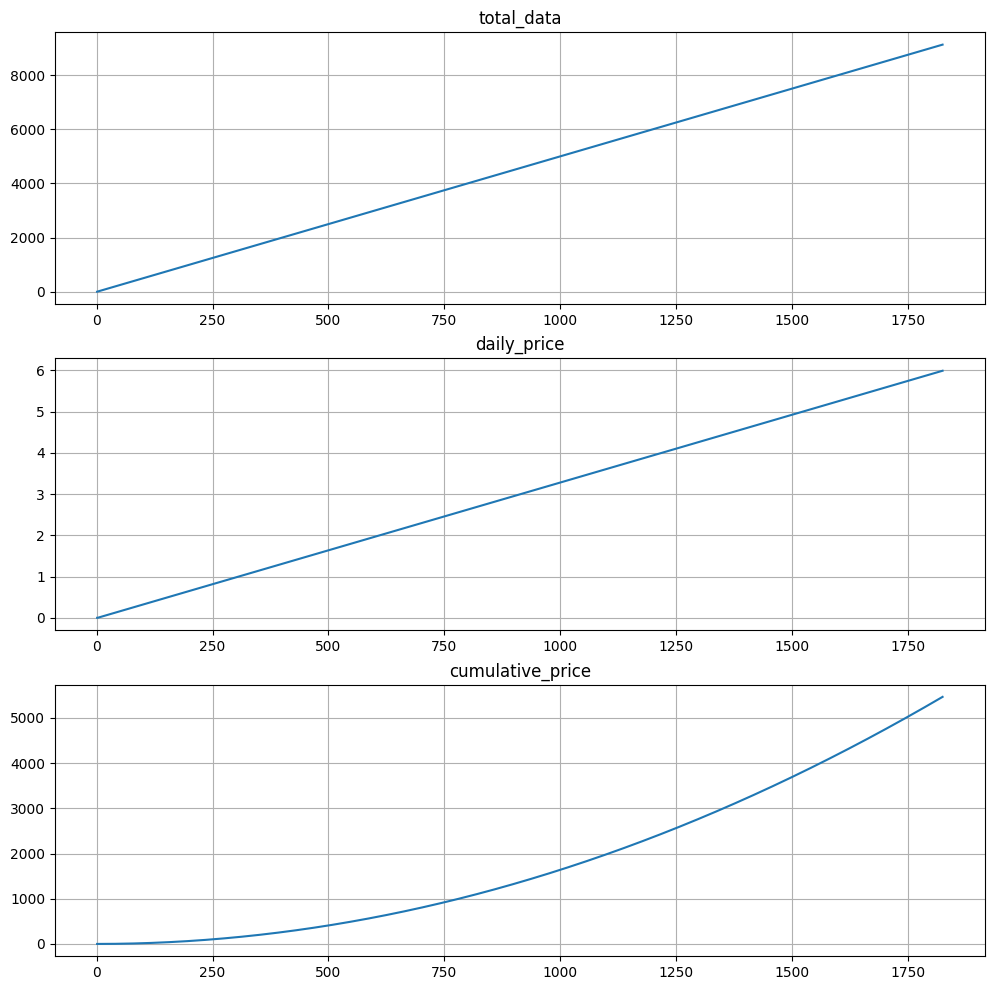

In [87]:
plt.figure(figsize = (12,12))
plt.subplot(3,1,1)
plt.plot(df['day'], df['total_data'])
plt.title("total_data")
plt.grid()
plt.subplot(3,1,2)
plt.plot(df['day'], df['daily_price'])
plt.title("daily_price")

plt.grid()
plt.subplot(3,1,3)
plt.plot(df['day'], df['cumulative_price'])
plt.title("cumulative_price")

plt.grid()



plt.show()